In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import random
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from sklearn.metrics import classification_report


In [5]:
data_dir = "/content/drive/MyDrive/Major/Fake-V-Real-Dataset"
categories = ['real', 'fake']
img_size = 48
dataset = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_label = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv.imread(os.path.join(path, img))
            new_array = cv.resize(img_array, (img_size, img_size))
            new_array = new_array / 255.0
            dataset.append([new_array, class_label])
        except Exception as e:
            pass

random.shuffle(dataset)

X = []
y = []

for features, label in dataset:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

# Print shapes to verify
print(X.shape)
print(y.shape)


(13346, 48, 48, 3)
(13346,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(10676, 48, 48, 3)
(2670, 48, 48, 3)
(10676,)
(2670,)


In [7]:
with open("X_train.pickle", "wb") as pickle_out:
    pickle.dump(X_train, pickle_out, protocol=4)

with open("y_train.pickle", "wb") as pickle_out:
    pickle.dump(y_train, pickle_out, protocol=4)

with open("X_test.pickle", "wb") as pickle_out:
    pickle.dump(X_test, pickle_out, protocol=4)

with open("y_test.pickle", "wb") as pickle_out:
    pickle.dump(y_test, pickle_out, protocol=4)

with open("X_train.pickle", "rb") as pickle_in:
    X_train = pickle.load(pickle_in)

with open("y_train.pickle", "rb") as pickle_in:
    y_train = pickle.load(pickle_in)

with open("X_test.pickle", "rb") as pickle_in:
    X_test = pickle.load(pickle_in)

with open("y_test.pickle", "rb") as pickle_in:
    y_test = pickle.load(pickle_in)

# Print shapes to verify
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10676, 48, 48, 3)
(10676,)
(2670, 48, 48, 3)
(2670,)


In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [13]:
model.fit(X_train, y_train, epochs=15)


Epoch 1/15
334/334 [==============================] - 69s 206ms/step - loss: 0.1606 - accuracy: 0.9346
Epoch 2/15
334/334 [==============================] - 48s 143ms/step - loss: 0.1536 - accuracy: 0.9398
Epoch 3/15
334/334 [==============================] - 48s 144ms/step - loss: 0.1622 - accuracy: 0.9335
Epoch 4/15
334/334 [==============================] - 48s 144ms/step - loss: 0.1448 - accuracy: 0.9431
Epoch 5/15
334/334 [==============================] - 58s 174ms/step - loss: 0.1358 - accuracy: 0.9444
Epoch 6/15
334/334 [==============================] - 59s 177ms/step - loss: 0.1411 - accuracy: 0.9420
Epoch 7/15
334/334 [==============================] - 50s 150ms/step - loss: 0.1232 - accuracy: 0.9496
Epoch 8/15
334/334 [==============================] - 48s 144ms/step - loss: 0.1234 - accuracy: 0.9516
Epoch 9/15
334/334 [==============================] - 48s 145ms/step - loss: 0.1080 - accuracy: 0.9570
Epoch 10/15
334/334 [==============================] - 47s 142ms/step - l

In [14]:
model.save("AI-V-Real-FinalModel.h5")
model_new = keras.models.load_model("AI-V-Real-FinalModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
model_new.evaluate(X_test, y_test)
y_pred = model_new.predict(X_test)

y_predicted = [1 if arr > 0.5 else 0 for arr in y_pred]

# Print classification report
print(classification_report(y_test, y_predicted))


84/84 [==============================] - 3s 31ms/step
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       661
           1       0.95      0.94      0.95      2009

    accuracy                           0.92      2670
   macro avg       0.89      0.89      0.89      2670
weighted avg       0.92      0.92      0.92      2670



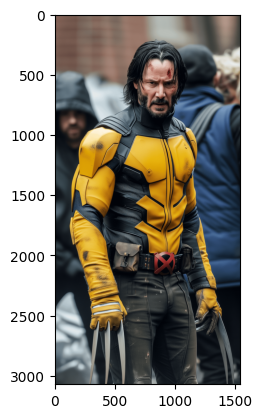

1/1 [==============================] - 0s 61ms/step
The given image is AI Generated.


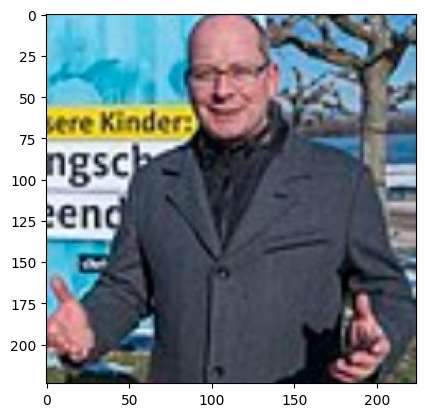

1/1 [==============================] - 0s 36ms/step
The given image is Real.


In [22]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(cv.cvtColor(img_arr, cv.COLOR_BGR2RGB))
    plt.show()

    new_arr = cv.resize(img_arr, (48, 48))
    new_arr = new_arr / 255.0
    test = np.array([new_arr]).reshape(-1, img_size, img_size, 3)

    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

# Example usage
path_img = '18643.png'
find_out(path_img)

path_img = '1908.jpg'
find_out(path_img)
